# EDA for Game Reviews data

In [1]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
games_data_full = pl.read_parquet(f"s3://raw/games/steam_games_*.parquet",
                                  glob=True,
                                  use_pyarrow=True,
                                  storage_options={
                                      "expand": True,
                                      "anon": True,
                                      "use_ssl": False,
                                      "client_kwargs": {"endpoint_url": "http://localhost:9000",
                                                        "region_name": "us-east-1"},
                                      "config_kwargs": {
                                          "s3": {"addressing_style": "path"}
                                      }
                                  })
games_data_full.columns

['appid',
 'name',
 'type',
 'required_age',
 'is_free',
 'minimum_pc_requirements',
 'recommended_pc_requirements',
 'controller_support',
 'detailed_description',
 'about_the_game',
 'short_description',
 'supported_languages',
 'header_image',
 'developers',
 'publishers',
 'price',
 'categories',
 'genres',
 'windows_support',
 'mac_support',
 'linux_support',
 'release_date',
 'coming_soon',
 'recommendations',
 'dlc',
 'review_score',
 'review_score_desc',
 'scrape_date']

In [3]:
games_data_full

appid,name,type,required_age,is_free,minimum_pc_requirements,recommended_pc_requirements,controller_support,detailed_description,about_the_game,short_description,supported_languages,header_image,developers,publishers,price,categories,genres,windows_support,mac_support,linux_support,release_date,coming_soon,recommendations,dlc,review_score,review_score_desc,scrape_date
i64,str,str,i64,bool,str,str,str,str,str,str,list[str],str,list[str],list[str],f64,list[str],list[str],bool,bool,bool,str,bool,i64,list[i64],i64,str,date
1712690,"""SourceWorlds""","""game""",0,false,"""Minimum:OS: Windows 10 (64-bit…",null,"""full""","""<h2 class=""bb_tag"">THE SOURCEW…","""<h2 class=""bb_tag"">THE SOURCEW…","""SourceWorlds is a co-op action…","[""English"", ""German"", … ""Simplified Chinese""]","""https://shared.akamai.steamsta…","[""TideOver Studios""]","[""TideOver Studios""]",21.0,"[""Single-player"", ""Multi-player"", … ""Family Sharing""]","[""Action"", ""Adventure"", ""Indie""]",true,false,false,"""10 Mar, 2023""",false,null,[],6,"""Mostly Positive""",2025-08-12
1796630,"""sCATch: The Painter Cat""","""game""",0,false,"""Minimum:OS *: Windows 7Process…",null,"""full""","""<h1>ALSO RECOMMENDED FOR YOU:<…","""<div class=""bb_img_ctn""><video…","""sCATch is a puzzle game where …","[""English"", ""Portuguese - Brazil""]","""https://shared.akamai.steamsta…","[""Colossus Game Studio""]","[""Colossus Game Studio""]",10.0,"[""Single-player"", ""Steam Achievements"", … ""Family Sharing""]","[""Casual"", ""Indie"", ""Strategy""]",true,false,false,"""19 Nov, 2021""",false,null,[],7,"""Positive""",2025-08-12
584640,"""SUPER CHICKEN JUMPER""","""game""",0,false,"""Minimum:Requires a 64-bit proc…","""Recommended:Requires a 64-bit …","""full""","""The world is in danger. Evil f…","""The world is in danger. Evil f…","""A spy-chicken tries to save th…","[""English"", ""Portuguese - Brazil""]","""https://shared.akamai.steamsta…","[""Sewer Cat"", ""Heavy Sheep""]","[""Sewer Cat""]",11.5,"[""Single-player"", ""Multi-player"", … ""Family Sharing""]","[""Action"", ""Adventure"", … ""Racing""]",true,false,false,"""24 Sep, 2021""",false,4596,[],8,"""Very Positive""",2025-08-12
1269030,"""Fred3ric""","""game""",0,false,"""Minimum:Requires a 64-bit proc…","""Recommended:Requires a 64-bit …",null,"""<div class=""bb_img_ctn""><img c…","""<div class=""bb_img_ctn""><img c…","""Frederic 3 is a continuation o…","[""English"", ""French"", … ""Polish""]","""https://shared.akamai.steamsta…","[""Forever Entertainment S. A.""]","[""Forever Entertainment S. A.""]",22.0,"[""Single-player"", ""Steam Achievements"", … ""Family Sharing""]","[""Action"", ""Adventure"", … ""Simulation""]",true,false,false,"""21 Sep, 2020""",false,null,[],5,"""Mixed""",2025-08-12
3824610,"""Wicked Cabins""","""game""",0,false,"""Minimum:OS: Windows 10Processo…",null,"""full""","""<p class=""bb_paragraph"">Wicked…","""<p class=""bb_paragraph"">Wicked…","""Wicked Cabins is a tiny relaxi…","[""English"", ""French"", … ""Russian""]","""https://shared.akamai.steamsta…","[""Dariusz Pietrala""]","[""Dariusz Pietrala""]",null,"[""Single-player"", ""Full controller support"", ""Family Sharing""]","[""Casual"", ""Indie"", ""Simulation""]",true,true,true,"""Coming soon""",true,null,[],0,"""No user reviews""",2025-08-12
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2690340,"""Movavi Video Suite 2024 - Adve…","""dlc""",0,true,"""Minimum:Requires a 64-bit proc…","""Recommended:Requires a 64-bit …",null,"""<strong>Make your videos look …","""<strong>Make your videos look …","""Make your videos look like unf…","[""English""]","""https://shared.akamai.steamsta…","[""Movavi""]","[""Movavi""]",null,"[""Downloadable Content""]","[""Animation & Modeling"", ""Design & Illustration"", … ""Video Production""]",true,false,false,"""18 Dec, 2023""",false,null,[],0,"""No user reviews""",2025-08-12
2567880,"""Gloves On!""","""game""",0,false,"""Minimum:Requires a 64-bit proc…","""Recommended:Requires a 64-bit …",null

In [39]:
games_data_full = games_data_full.filter(pl.col("type") == "game")
games_data_full.shape

(7115, 28)

In [4]:
reviews = games_data_full = pl.read_parquet(f"s3://raw/reviews/steam_reviews_*.parquet",
                                  glob=True,
                                  use_pyarrow=True,
                                  storage_options={
                                      "expand": True,
                                      "anon": True,
                                      "use_ssl": False,
                                      "client_kwargs": {"endpoint_url": "http://localhost:9000",
                                                        "region_name": "us-east-1"},
                                      "config_kwargs": {
                                          "s3": {"addressing_style": "path"}
                                      }
                                  })
reviews.columns

['rec_id',
 'author_id',
 'appid',
 'playtime_forever',
 'playtime_last_two_weeks',
 'playtime_at_review',
 'num_games_owned',
 'num_reviews',
 'last_played',
 'language',
 'review',
 'timestamp_created',
 'timestamp_updated',
 'voted_up',
 'votes_up',
 'votes_funny',
 'weighted_vote_score',
 'comment_count',
 'steam_purchase',
 'received_for_free',
 'written_during_early_access',
 'primarily_steam_deck',
 'scrape_date']

In [5]:
len(reviews)

114272

In [6]:
reviews_by_game = reviews.group_by("appid").agg([
    pl.col("playtime_forever").sum().alias("total_playtime"),
    pl.col("voted_up").sum().alias("total_positive_reviews"),
    (~pl.col("voted_up")).sum().alias("total_negative_reviews"),
    pl.col("voted_up").mean().alias("votes_ratio"),
    ((pl.col("weighted_vote_score") * pl.col("voted_up")).sum() / pl.col("weighted_vote_score").sum()).alias(
        "weighted_votes"),
    pl.col("timestamp_created").max().alias("last_review"),
    pl.col("rec_id").count().alias("total_reviews"),
    pl.col("steam_purchase").sum().alias("steam_purchases"),
    pl.col("received_for_free").sum().alias("free_purchases"),
    pl.col("written_during_early_access").sum().alias("early_access_reviews")
])

In [7]:
reviews_by_game

appid,total_playtime,total_positive_reviews,total_negative_reviews,votes_ratio,weighted_votes,last_review,total_reviews,steam_purchases,free_purchases,early_access_reviews
i64,i64,u32,u32,f64,f64,i64,u32,u32,u32,u32
2958360,0,1,0,1.0,1.0,1734883465,1,1,0,0
402160,227092,115,144,0.444015,0.430638,1748802974,259,259,0,241
3591200,271,1,0,1.0,1.0,1746758324,1,1,0,0
1998852,0,5,0,1.0,1.0,1706139483,5,5,1,0
533110,0,225,82,0.732899,0.7481,1748323571,307,307,3,0
…,…,…,…,…,…,…,…,…,…,…
551971,0,1,1,0.5,0.543155,1480567740,2,2,0,0
2760650,322,1,1,0.5,0.434015,1717711409,2,2,0,2
107200,9656240,1692,147,0.920065,0.928525,1748225718,1839,1839,2,0


In [8]:
reviews_by_game_name = reviews_by_game.join(games_data_full, on="appid").select(
    "appid",
    "name",
    pl.all().exclude(["appid", "name"])
)
reviews_by_game_name

appid,name,total_playtime,total_positive_reviews,total_negative_reviews,votes_ratio,weighted_votes,last_review,total_reviews,steam_purchases,free_purchases,early_access_reviews,type,required_age,is_free,minimum_pc_requirements,recommended_pc_requirements,controller_support,detailed_description,about_the_game,short_description,supported_languages,header_image,developers,publishers,price,genres,windows_support,mac_support,linux_support,release_date,coming_soon,recommendations,dlc,review_score,review_score_desc,total_positive_reviews_right,total_negative_reviews_right,total_reviews_right,categories
i64,str,i64,u32,u32,f64,f64,i64,u32,u32,u32,u32,str,i64,bool,str,str,str,str,str,str,list[str],str,list[str],list[str],f64,list[str],bool,bool,bool,str,bool,i64,list[i64],i64,str,i64,i64,i64,list[str]
846250,"""Devious""",1333,2,2,0.5,0.54069,1622395590,4,4,0,0,"""game""",0,false,"""Minimum:OS *: Win XP+Processor…",null,null,"""<img class=""bb_img"" src=""https…","""<img class=""bb_img"" src=""https…","""A real time first person dunge…","[""English""]","""https://shared.akamai.steamsta…","[""Top Hat Curios""]","[""Nutaku Publishing""]",37.0,"[""Action"", ""Indie"", ""RPG""]",true,false,false,"""26 Jul, 2018""",false,null,[],0,"""4 user reviews""",2,2,4,"[""Single-player"", ""Family Sharing""]"
512260,"""Avalon Legends Solitaire 2""",87572,36,5,0.878049,0.884581,1741769879,41,41,0,0,"""game""",0,false,"""Minimum:OS *: Windows Vista, 7…",null,null,"""<strong>Harness the magic of t…","""<strong>Harness the magic of t…","""Harness the power of the cards…","[""English"", ""French"", … ""Portuguese - Brazil""]","""https://shared.akamai.steamsta…","[""Anawiki Games""]","[""Anawiki Games""]",22.0,"[""Casual"", ""Indie""]",true,true,false,"""4 Oct, 2016""",false,null,[],7,"""Positive""",36,5,41,"[""Single-player"", ""Steam Achievements"", … ""Family Sharing""]"
621780,"""Virtually Impossible""",947,5,7,0.416667,0.405161,1657479478,12,12,0,0,"""game""",0,false,"""Minimum:OS *: Windows 7 SP1, W…","""Recommended:OS *: Windows 7 SP…",null,"""The Impossible VR Party Game. …","""The Impossible VR Party Game. …","""The Impossible VR Party Game. …","[""English""]","""https://shared.akamai.steamsta…","[""Growl Interactive""]","[""Growl Interactive""]",27.95,"[""Action"", ""Adventure"", … ""Simulation""]",true,false,false,"""13 Apr, 2017""",false,null,[],5,"""Mixed""",5,7,12,"[""Single-player"", ""Multi-player"", … ""Family Sharing""]"
696180,"""Bullet Witch""",195476,235,97,0.707831,0.723956,1748684171,332,332,1,0,"""game""",0,false,"""Minimum:OS *: Windows 7+Proces…","""Recommended:OS *: Windows 7+Pr…",null,"""<i>First, there was the earthq…","""<i>First, there was the earthq…","""An army of demons has driven h…","[""English"", ""French"", … ""Japanese""]","""https://shared.akamai.steamsta…","[""Marvelous, Inc.""]","[""XSEED Games"", ""Marvelous USA, Inc."", ""Marvelous Europe""]",31.0,"[""Action""]",true,false,false,"""25 Apr, 2018""",false,611,[],6,"""Mostly Positive""",235,97,332,"[""Single-player"", ""Steam Achievements"", … ""Family Sharing""]"
934470,"""A Top-Down Job: Blood Gain""",7,0,1,0.0,0.0,1538190550,1,1,0,0,"""game""",0,false,"""Minimum:OS *: Windows 7Process…",null,null,"""<strong>You need money. People…","""<strong>You need money. People…","""A Top-Down Job: Blood Gain is …","[""English""]","""https://shared.akamai.steamsta…","[""Bletblet Studio""]","[""Bletblet Studio""]",2.5,"[""Action"", ""Indie""]",true,true,true,"""25 Sep, 2018""",false,null,[],0,"""1 user reviews""",0,1,1,"[""Single-player"", ""Family Sharing""]"
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
48150,"""Voodoo Dice""",6413,9,3,0.75,0.754942,1737396947,12,12,0,0,"""game""",0,false,"""Minimum: OS *:…","""Recommended: O…",null,"""Roll the dice in a mystical wo…","""Roll the dice in a mystical wo…","""Roll the dice in a mystical wo…","[""English"", ""French"", … ""Spanish - Spain""]","""https://shared.akamai.steamsta…","[""Exkee""]","[""

In [9]:
reviews_by_game_name.filter(pl.col("total_playtime") == 0)

appid,name,total_playtime,total_positive_reviews,total_negative_reviews,votes_ratio,weighted_votes,last_review,total_reviews,steam_purchases,free_purchases,early_access_reviews,type,required_age,is_free,minimum_pc_requirements,recommended_pc_requirements,controller_support,detailed_description,about_the_game,short_description,supported_languages,header_image,developers,publishers,price,genres,windows_support,mac_support,linux_support,release_date,coming_soon,recommendations,dlc,review_score,review_score_desc,total_positive_reviews_right,total_negative_reviews_right,total_reviews_right,categories
i64,str,i64,u32,u32,f64,f64,i64,u32,u32,u32,u32,str,i64,bool,str,str,str,str,str,str,list[str],str,list[str],list[str],f64,list[str],bool,bool,bool,str,bool,i64,list[i64],i64,str,i64,i64,i64,list[str]
56438,"""Dawn of War II: Retribution – …",0,17,0,1.0,1.0,1356816818,17,17,0,0,"""game""",0,false,"""Minimum: OS *: Windows XP…","""Recommended: OS *: Window…",null,"""Dawn of War II, Last Stand is …","""Dawn of War II, Last Stand is …","""Dawn of War II, Last Stand is …","[""English"", ""French"", … ""Spanish - Spain""]","""https://shared.akamai.steamsta…","[""Relic Entertainment"", ""Feral Interactive (Mac/Linux)""]","[""SEGA"", ""Feral Interactive (Mac/Linux)""]",null,"[""Strategy""]",true,true,true,"""20 Apr, 2011""",false,null,[],7,"""Positive""",17,0,17,"[""Multi-player"", ""Co-op"", ""Family Sharing""]"
42900,"""Hearts of Iron III: Semper Fi""",0,1,0,1.0,1.0,1324617364,1,1,0,0,"""game""",0,false,"""OS *: Windows XP/Vista/7 …",null,null,"""It’s time to dust off the fiel…","""It’s time to dust off the fiel…","""It’s time to dust off the fiel…","[""English""]","""https://shared.akamai.steamsta…","[""Paradox Development Studio""]","[""Paradox Interactive""]",14.45,"[""Strategy""]",true,false,false,"""7 Jun, 2010""",false,null,"[42905, 42903, 42902]",0,"""1 user reviews""",1,0,1,"[""Multi-player"", ""Co-op"", ""Family Sharing""]"
488824,"""Tom Clancy's Rainbow Six® Sieg…",0,1,1,0.5,0.525155,1468210849,2,2,0,0,"""game""",17,false,"""Minimum:OS: Windows 10, Window…","""Recommended:OS: Windows 10, Wi…","""full""","""<h1>Edition Comparison</h1><p>…","""“One of the best first-person …","""Tom Clancy's Rainbow Six® Sieg…","[""English"", ""French"", … ""Thai""]","""https://shared.akamai.steamsta…","[""Ubisoft Montreal""]","[""Ubisoft""]",74.99,"[""Action""]",true,false,false,"""1 Dec, 2015""",false,1187468,"[377560, 417461, … 455572]",0,"""2 user reviews""",1,1,2,"[""Single-player"", ""Multi-player"", … ""Remote Play on Tablet""]"
35725,"""Trine 2: Complete Story""",0,9,1,0.9,0.899303,1362947947,10,10,0,0,"""game""",0,false,"""OS *: Windows 8 / 7 / Vista / …",null,"""full""","""<img class=""bb_img"" src=""https…","""<img class=""bb_img"" src=""https…","""Three Heroes make their way th…","[""English"", ""Finnish"", … ""Traditional Chinese""]","""https://shared.akamai.steamsta…","[""Frozenbyte""]","[""Frozenbyte""]",49.95,"[""Action"", ""Adventure"", ""Indie""]",true,true,true,"""6 Jun, 2013""",false,14979,[1228580],7,"""Positive""",9,1,10,"[""Single-player"", ""Multi-player"", … ""Family Sharing""]"
365820,"""Company of Heroes 2 - The Brit…",0,73,28,0.722772,0.732082,1748647483,101,101,6,0,"""game""",17,false,"""Minimum:Memory: 2GB RAM Proces…","""Recommended:Memory: 4GB RAMPro…",null,"""Company of Heroes 2: The Briti…","""Company of Heroes 2: The Briti…","""This latest multiplayer standa…","[""Czech"", ""English"", … ""Spanish - Spain""]","""https://shared.akamai.steamsta…","[""Relic Entertainment"", ""Feral Interactive (Mac)"", ""Feral Interactive (Linux)""]","[""SEGA"", ""Feral Interactive (Mac)"", ""Feral Interactive (Linux)""]",29.95,"[""Strategy""]",true,true,true,"""2 Sep, 2015""",false,219,"[260292, 260293, 260291]",6,"""Mostly Positive""",73,28,101,"[""Multi-player"", ""Steam Achievements"", … ""Family Sharing""]"
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2662630,"""The Elder Scrolls Online: Gold…",

In [10]:
review_score_games = reviews_by_game_name.select(
    "appid",
    "name",
    "votes_ratio",
    "weighted_votes",
    "review_score",
    "review_score_desc",
    "total_reviews",
    "total_negative_reviews",
    "total_positive_reviews",
    "total_reviews_right",
    "total_negative_reviews_right",
    "total_positive_reviews_right"
)
review_score_games

appid,name,votes_ratio,weighted_votes,review_score,review_score_desc,total_reviews,total_negative_reviews,total_positive_reviews,total_reviews_right,total_negative_reviews_right,total_positive_reviews_right
i64,str,f64,f64,i64,str,u32,u32,u32,i64,i64,i64
846250,"""Devious""",0.5,0.54069,0,"""4 user reviews""",4,2,2,4,2,2
512260,"""Avalon Legends Solitaire 2""",0.878049,0.884581,7,"""Positive""",41,5,36,41,5,36
621780,"""Virtually Impossible""",0.416667,0.405161,5,"""Mixed""",12,7,5,12,7,5
696180,"""Bullet Witch""",0.707831,0.723956,6,"""Mostly Positive""",332,97,235,332,97,235
934470,"""A Top-Down Job: Blood Gain""",0.0,0.0,0,"""1 user reviews""",1,1,0,1,1,0
…,…,…,…,…,…,…,…,…,…,…,…
48150,"""Voodoo Dice""",0.75,0.754942,6,"""Mostly Positive""",12,3,9,12,3,9
844130,"""Future Proof""",1.0,1.0,7,"""Positive""",23,0,23,23,0,23
2415340,"""Elf World Adventure""",0.733333,0.723309,6,"""Mostly Positive""",15,4,11,15,4,11


<Axes: xlabel='review_score', ylabel='Count'>

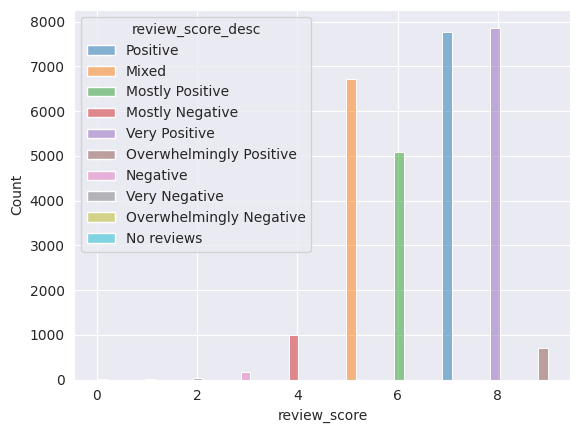

In [11]:
sns.histplot(data=review_score_games.filter(~pl.col("review_score_desc").str.contains("user reviews")),
             x="review_score", hue="review_score_desc")

<Axes: xlabel='votes_ratio', ylabel='weighted_votes'>

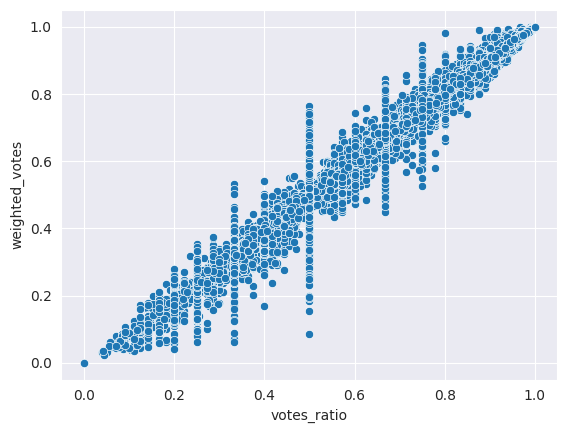

In [12]:
sns.scatterplot(data=review_score_games, x="votes_ratio", y="weighted_votes")

<Axes: xlabel='review_score', ylabel='weighted_votes'>

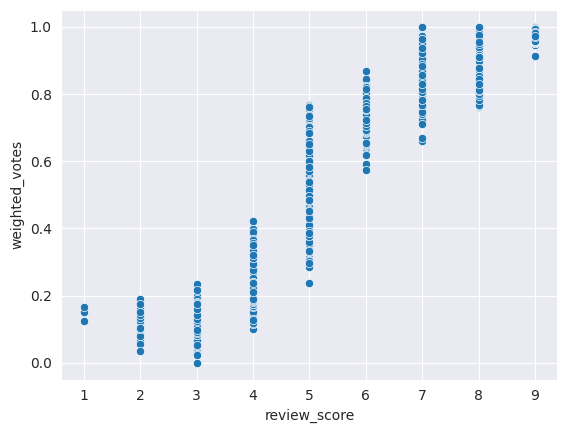

In [14]:
sns.scatterplot(data=review_score_games.filter(~pl.col("review_score_desc").str.contains("reviews")), x="review_score",
                y="weighted_votes")  # Score 0 means not enough reviews (from None to 10)

In [15]:
review_score_games.filter(
    (~pl.col("review_score_desc").str.contains("user reviews")) & (pl.col("review_score") == 4)).sort(
    "review_score_desc", descending=True)

appid,name,votes_ratio,weighted_votes,review_score,review_score_desc,total_reviews,total_negative_reviews,total_positive_reviews,total_reviews_right,total_negative_reviews_right,total_positive_reviews_right
i64,str,f64,f64,i64,str,u32,u32,u32,i64,i64,i64
1368060,"""dead run""",0.375,0.376605,4,"""Mostly Negative""",16,10,6,16,10,6
697250,"""Beyond Enemy Lines 2 Enhanced …",0.388889,0.373352,4,"""Mostly Negative""",18,11,7,18,11,7
330350,"""Robotex""",0.229391,0.21914,4,"""Mostly Negative""",279,215,64,279,215,64
334040,"""Down To One""",0.360149,0.35156,4,"""Mostly Negative""",808,517,291,808,517,291
1099450,"""The Endless White""",0.384615,0.350905,4,"""Mostly Negative""",13,8,5,13,8,5
…,…,…,…,…,…,…,…,…,…,…,…
438020,"""AI: Rampage""",0.258824,0.241707,4,"""Mostly Negative""",85,63,22,85,63,22
1114000,"""King of Dragon Balls""",0.272727,0.238374,4,"""Mostly Negative""",11,8,3,11,8,3
1224700,"""Kingpin: Reloaded""",0.363636,0.331723,4,"""Mostly Negative""",220,140,80,220,140,80


In [16]:
review_score_games["review_score_desc"].value_counts()

review_score_desc,count
str,u32
"""Very Positive""",7867
"""Mostly Positive""",5090
"""5 user reviews""",2296
"""Mixed""",6729
"""1 user reviews""",7471
…,…
"""Positive""",7765
"""4 user reviews""",2816
"""Overwhelmingly Positive""",704


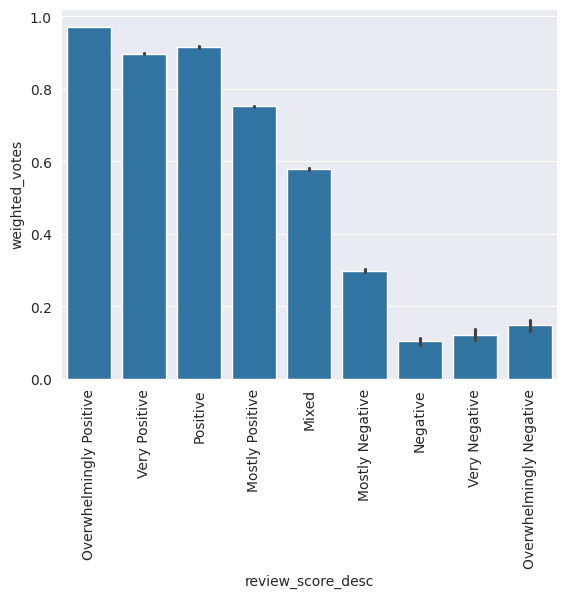

In [17]:
sns.barplot(data=review_score_games, x="review_score_desc", y="weighted_votes",
            order=["Overwhelmingly Positive", "Very Positive", "Positive", "Mostly Positive", "Mixed",
                   "Mostly Negative", "Negative", "Very Negative", "Overwhelmingly Negative"])
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='total_reviews', ylabel='total_reviews_right'>

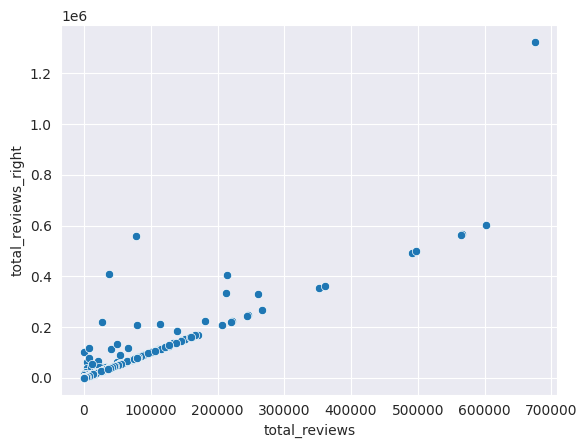

In [18]:
sns.scatterplot(data=review_score_games, x="total_reviews", y="total_reviews_right")

<Axes: xlabel='total_positive_reviews', ylabel='total_positive_reviews_right'>

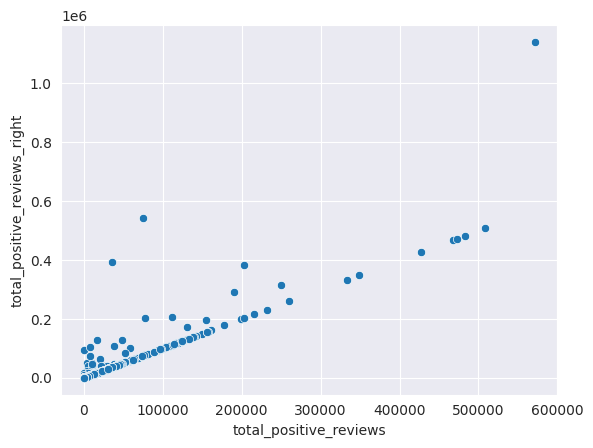

In [19]:
sns.scatterplot(data=review_score_games, x="total_positive_reviews", y="total_positive_reviews_right")

<Axes: xlabel='total_negative_reviews', ylabel='total_negative_reviews_right'>

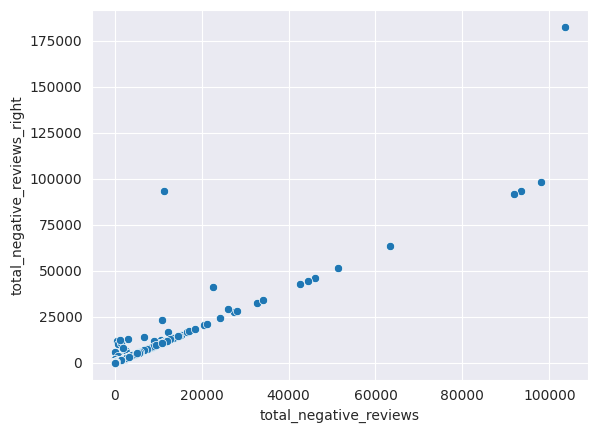

In [20]:
sns.scatterplot(data=review_score_games, x="total_negative_reviews", y="total_negative_reviews_right")

In [21]:
review_score_games.filter(pl.col("total_reviews") != pl.col("total_reviews_right")).sort(by="total_reviews_right",
                                                                                         descending=True)

appid,name,votes_ratio,weighted_votes,review_score,review_score_desc,total_reviews,total_negative_reviews,total_positive_reviews,total_reviews_right,total_negative_reviews_right,total_positive_reviews_right
i64,str,f64,f64,i64,str,u32,u32,u32,i64,i64,i64
730,"""Counter-Strike 2""",0.846421,0.846314,8,"""Very Positive""",675283,103709,571574,1324019,182665,1141354
359550,"""Tom Clancy's Rainbow Six® Sieg…",0.844784,0.845318,8,"""Very Positive""",601633,93383,508250,601539,93393,508146
553850,"""HELLDIVERS™ 2""",0.826544,0.826935,8,"""Very Positive""",565868,98153,467715,565822,98072,467750
271590,"""Grand Theft Auto V Legacy""",0.83711,0.836321,8,"""Very Positive""",564527,91956,472571,564597,91976,472621
105600,"""Terraria""",0.960879,0.962903,9,"""Overwhelmingly Positive""",78398,3067,75331,557111,12687,544424
…,…,…,…,…,…,…,…,…,…,…,…
2075540,"""Valete vos viatores""",1.0,1.0,0,"""No reviews""",1,0,1,0,0,0
3609520,"""Sweet Disco""",1.0,1.0,0,"""No reviews""",1,0,1,0,0,0
3713210,"""BATTLE SHADOW ARENA""",1.0,1.0,0,"""No reviews""",1,0,1,0,0,0


### Check for correlations

In [22]:
corr_review_games = reviews_by_game_name.select(
    "total_positive_reviews",
    "total_negative_reviews",
    "total_reviews",
    "review_score",
    "is_free"
)

In [23]:
corr = corr_review_games.corr()

In [24]:
corr

total_positive_reviews,total_negative_reviews,total_reviews,review_score,is_free
f64,f64,f64,f64,f64
1.0,0.797712,0.996794,0.10132,-0.00393
0.797712,1.0,0.843404,0.073881,0.003678
0.996794,0.843404,1.0,0.100073,-0.003013
0.10132,0.073881,0.100073,1.0,-0.063062
-0.00393,0.003678,-0.003013,-0.063062,1.0


<Axes: >

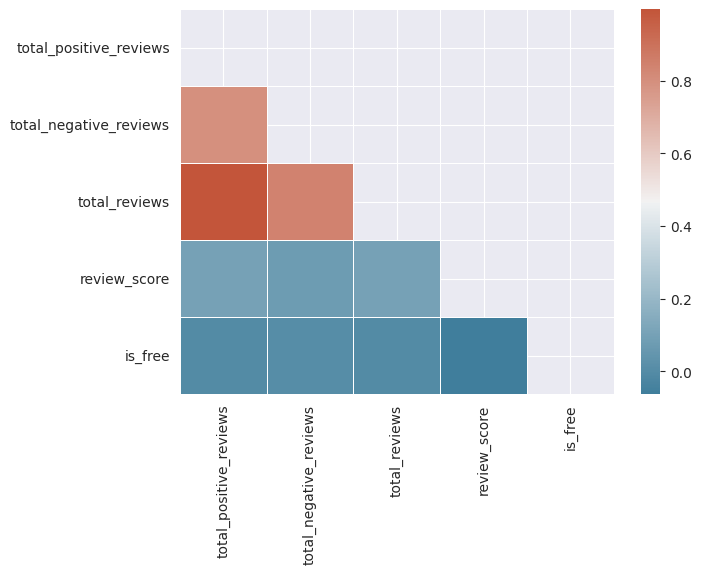

In [25]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(7, 5))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap,
            linewidths=.5, xticklabels=corr.columns, yticklabels=corr.columns)

<Axes: xlabel='review_score', ylabel='total_reviews'>

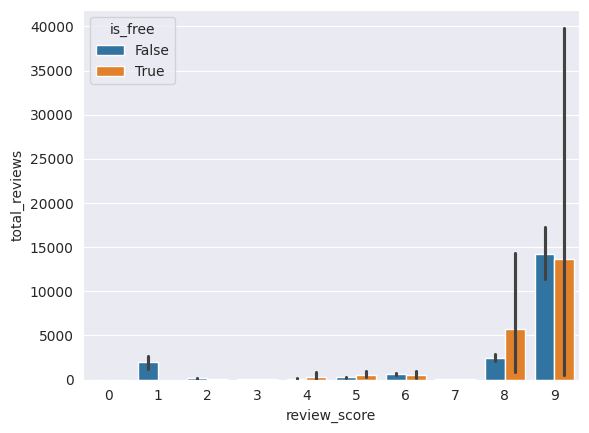

In [26]:
sns.barplot(data=corr_review_games, x="review_score", y="total_reviews", hue="is_free")

### Games received for free analysis

In [27]:
reviews_by_game_name.select("steam_purchases", "free_purchases", "total_reviews")

steam_purchases,free_purchases,total_reviews
u32,u32,u32
4,0,4
41,0,41
12,0,12
332,1,332
1,0,1
…,…,…
12,0,12
23,0,23
15,0,15


In [28]:
votes_received_for_free = reviews.group_by(["voted_up", "received_for_free"]).agg(pl.len().alias("count"))

In [29]:
totals = votes_received_for_free.group_by("received_for_free").agg(pl.col("count").sum().alias("total"))
totals

received_for_free,total
bool,u32
true,557663
false,35795369


In [30]:
scaled_votes = votes_received_for_free.join(
    totals,
    on="received_for_free",
).with_columns(
    (pl.col("count").cast(pl.Float64) / pl.col("total") * 100.0)
    .alias("percentage")
).select("voted_up", "received_for_free", "percentage")

In [31]:
scaled_votes

voted_up,received_for_free,percentage
bool,bool,f64
false,false,12.485456
true,false,87.514544
true,true,91.778547
false,true,8.221453


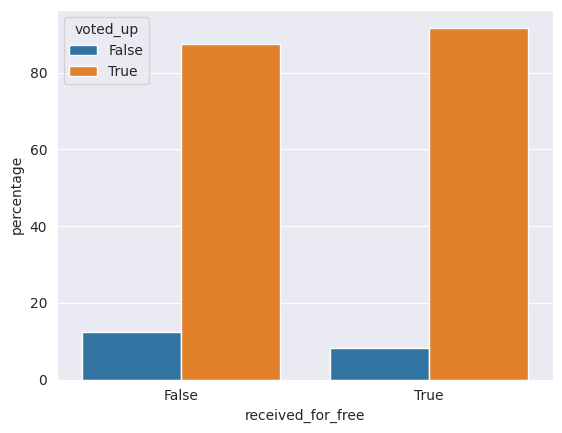

In [32]:
sns.barplot(scaled_votes, x="received_for_free", y="percentage", hue="voted_up")
plt.show()  # not much difference

### Trending of games popularities over time

In [33]:
# Sample 100 popular games
popular_games = reviews_by_game_name.filter(
    pl.col("total_positive_reviews_right") > pl.col("total_positive_reviews_right").quantile(0.98)).sample(100,
                                                                                                           seed=42).sort(
    "total_positive_reviews", descending=True)
popular_games

appid,name,total_playtime,total_positive_reviews,total_negative_reviews,votes_ratio,weighted_votes,last_review,total_reviews,steam_purchases,free_purchases,early_access_reviews,type,required_age,is_free,minimum_pc_requirements,recommended_pc_requirements,controller_support,detailed_description,about_the_game,short_description,supported_languages,header_image,developers,publishers,price,genres,windows_support,mac_support,linux_support,release_date,coming_soon,recommendations,dlc,review_score,review_score_desc,total_positive_reviews_right,total_negative_reviews_right,total_reviews_right,categories
i64,str,i64,u32,u32,f64,f64,i64,u32,u32,u32,u32,str,i64,bool,str,str,str,str,str,str,list[str],str,list[str],list[str],f64,list[str],bool,bool,bool,str,bool,i64,list[i64],i64,str,i64,i64,i64,list[str]
4000,"""Garry's Mod""",19668984734,483022,14816,0.970239,0.971459,1749479452,497838,497838,17315,0,"""game""",0,false,"""Minimum:OS: Windows® 10Process…","""Recommended:OS: Windows® 10/11…",null,"""Garry's Mod is a physics sandb…","""Garry's Mod is a physics sandb…","""Garry's Mod is a physics sandb…","[""English"", ""French"", … ""Ukrainian""]","""https://shared.akamai.steamsta…","[""Facepunch Studios""]","[""Valve""]",27.95,"[""Casual"", ""Indie"", ""Simulation""]",true,true,true,"""29 Nov, 2006""",false,996317,[],9,"""Overwhelmingly Positive""",483071,14819,497890,"[""Single-player"", ""Multi-player"", … ""Family Sharing""]"
252490,"""Rust""",33253799361,427404,63368,0.870881,0.871746,1749538340,490772,490772,18306,61289,"""game""",0,false,"""Minimum:Requires a 64-bit proc…","""Recommended:Requires a 64-bit …",null,"""<p class=""bb_paragraph"">The on…","""<p class=""bb_paragraph"">The on…","""The only aim in Rust is to sur…","[""English"", ""French"", … ""Vietnamese""]","""https://shared.akamai.steamsta…","[""Facepunch Studios""]","[""Facepunch Studios""]",84.99,"[""Action"", ""Adventure"", … ""RPG""]",true,true,false,"""8 Feb, 2018""",false,1017811,"[1174370, 1353060, … 1701720]",8,"""Very Positive""",427366,63381,490747,"[""Multi-player"", ""MMO"", … ""Remote Play on Tablet""]"
292030,"""The Witcher 3: Wild Hunt""",2384573805,215295,7076,0.968179,0.972711,1749456185,222371,222371,2452,0,"""game""",17,false,"""Minimum:OS *: 64-bit Windows 7…","""Recommended:OS: 64-bit Windows…",null,"""<h1>DISCOVER THE STORY BEFORE …","""<p class=""bb_paragraph"">One of…","""You are Geralt of Rivia, merce…","[""English"", ""French"", … ""Spanish - Latin America""]","""https://shared.akamai.steamsta…","[""CD PROJEKT RED""]","[""CD PROJEKT RED""]",95.99,"[""RPG""]",true,false,false,"""18 May, 2015""",false,771055,"[355880, 378649, … 1233340]",9,"""Overwhelmingly Positive""",215341,7080,222421,"[""Single-player"", ""Steam Achievements"", … ""Family Sharing""]"
548430,"""Deep Rock Galactic""",2424072934,156543,3266,0.979563,0.982007,1749396597,159809,159809,824,15074,"""game""",0,false,"""Minimum:Requires a 64-bit proc…","""Recommended:Requires a 64-bit …","""full""","""<h1>Game Editions</h1><p><p cl…","""<img class=""bb_img"" src=""https…","""Deep Rock Galactic is a 1-4 pl…","[""English"", ""French"", … ""Romanian""]","""https://shared.akamai.steamsta…","[""Ghost Ship Games""]","[""Coffee Stain Publishing""]",53.0,"[""Action""]",true,false,false,"""13 May, 2020""",false,273263,"[3481460, 2934390, … 802640]",9,"""Overwhelmingly Positive""",156544,3268,159812,"[""Single-player"", ""Multi-player"", … ""Family Sharing""]"
252950,"""Rocket League®""",11860394131,154797,26002,0.856183,0.856084,1749526036,180799,180799,4697,0,"""game""",0,false,"""Minimum:OS *: Windows 7 (64 bi…","""Recommended:OS *: Windows 7 (6…",null,"""Rocket League is a high-powere…","""Rocket League is a high-powere…","""Rocket League is a high-powere…","[""English"", ""French"", … ""Polish""]","""https://shared.akamai.steamsta…","[""Psyonix LLC""]","[""Psyonix LLC""]",null,"[""Action"", ""Indie"", … ""Sports""]",true,false,false,"""6 Jul, 2015""",false,433930,[],8,"""Very Positive""",195

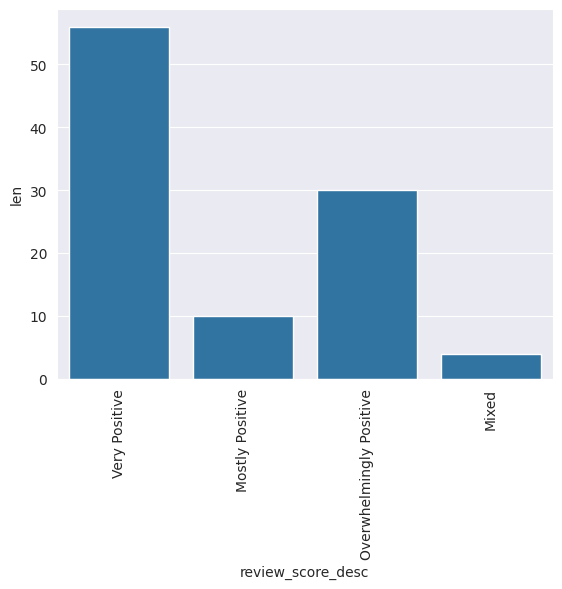

In [34]:
count_plot = popular_games.group_by("review_score_desc").agg(pl.len())
sns.barplot(count_plot, x="review_score_desc", y="len")
plt.xticks(rotation=90)
plt.show()

In [35]:
reviews_from_popular_games = reviews.join(popular_games, on="appid").select(
    "rec_id",
    "author_id",
    "appid",
    "name",
    pl.all().exclude(["rec_id", "author_id", "appid", "name"])
)
reviews_from_popular_games = reviews_from_popular_games.with_columns(
    review_date=pl.from_epoch(pl.col("timestamp_created"), time_unit="s")
)
reviews_from_popular_games

rec_id,author_id,appid,name,playtime_forever,playtime_last_two_weeks,playtime_at_review,num_games_owned,num_reviews,last_played,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,primarily_steam_deck,total_playtime,total_positive_reviews,total_negative_reviews,votes_ratio,weighted_votes,last_review,total_reviews,steam_purchases,free_purchases,early_access_reviews,type,required_age,is_free,minimum_pc_requirements,recommended_pc_requirements,controller_support,detailed_description,about_the_game,short_description,supported_languages,header_image,developers,publishers,price,genres,windows_support,mac_support,linux_support,release_date,coming_soon,recommendations,dlc,review_score,review_score_desc,total_positive_reviews_right,total_negative_reviews_right,total_reviews_right,categories,review_date
i64,i64,i64,str,i64,i64,i64,i64,i64,i64,str,str,i64,i64,bool,i64,i64,f64,i64,bool,bool,bool,bool,i64,u32,u32,f64,f64,i64,u32,u32,u32,u32,str,i64,bool,str,str,str,str,str,str,list[str],str,list[str],list[str],f64,list[str],bool,bool,bool,str,bool,i64,list[i64],i64,str,i64,i64,i64,list[str],datetime[μs]
196678086,76561198084604583,246900,"""Viscera Cleanup Detail""",8634,null,8634,360,13,1742258854,"""english""","""What is there to say about tha…",1749352754,1749352754,true,0,0,0.5,0,true,false,false,false,29515197,9207,647,0.934341,0.941159,1749352754,9854,9854,76,1383,"""game""",0,false,"""Minimum:OS *: Win XP SP3, Win …","""Recommended:OS *: Win XP SP3, …","""full""","""<h2 class=""bb_tag"">IMPORTANT F…","""<h2 class=""bb_tag"">IMPORTANT F…","""In Viscera Cleanup Detail, you…","[""English""]","""https://shared.akamai.steamsta…","[""RuneStorm""]","[""RuneStorm""]",29.5,"[""Indie"", ""Simulation""]",true,true,false,"""23 Oct, 2015""",false,16883,"[386860, 413160, 982110]",8,"""Very Positive""",9209,647,9856,"[""Single-player"", ""Multi-player"", … ""Family Sharing""]",2025-06-08 03:19:14
196661342,76561199056215671,246900,"""Viscera Cleanup Detail""",2029,436,1985,null,18,1749337320,"""english""","""Satisfying""",1749334528,1749334528,true,0,0,0.5,0,true,false,false,false,29515197,9207,647,0.934341,0.941159,1749352754,9854,9854,76,1383,"""game""",0,false,"""Minimum:OS *: Win XP SP3, Win …","""Recommended:OS *: Win XP SP3, …","""full""","""<h2 class=""bb_tag"">IMPORTANT F…","""<h2 class=""bb_tag"">IMPORTANT F…","""In Viscera Cleanup Detail, you…","[""English""]","""https://shared.akamai.steamsta…","[""RuneStorm""]","[""RuneStorm""]",29.5,"[""Indie"", ""Simulation""]",true,true,false,"""23 Oct, 2015""",false,16883,"[386860, 413160, 982110]",8,"""Very Positive""",9209,647,9856,"[""Single-player"", ""Multi-player"", … ""Family Sharing""]",2025-06-07 22:15:28
196644919,76561197972697226,246900,"""Viscera Cleanup Detail""",153,153,153,null,4,1749270703,"""english""","""I like cleaning so I thought I…",1749320560,1749320560,false,0,0,0.5,0,true,false,false,false,29515197,9207,647,0.934341,0.941159,1749352754,9854,9854,76,1383,"""game""",0,false,"""Minimum:OS *: Win XP SP3, Win …","""Recommended:OS *: Win XP SP3, …","""full""","""<h2 class=""bb_tag"">IMPORTANT F…","""<h2 class=""bb_tag"">IMPORTANT F…","""In Viscera Cleanup Detail, you…","[""English""]","""https://shared.akamai.steamsta…","[""RuneStorm""]","[""RuneStorm""]",29.5,"[""Indie"", ""Simulation""]",true,true,false,"""23 Oct, 2015""",false,16883,"[386860, 413160, 982110]",8,"""Very Positive""",9209,647,9856,"[""Single-player"", ""Multi-player"", … ""Family Sharing""]",2025-06-07 18:22:40
196429289,76561198978610273,246900,"""Viscera Cleanup Detail""",33,null,33,null,6,1747271290,"""english""","""Unable to join my friend. Just…",1749093681,1749093681,false,0,0,0.5,0,true,false,false,false,29515197,9207,647,0.934341,0.941159,1749352754,9854,9854,76,1383,"""game""",0,false,"""Minimum:OS *: Win XP SP3, Win …","""Recommended:OS *: Win XP SP3, …","""full""","""<h2 class="

In [36]:
timestamps = pl.from_epoch(reviews_from_popular_games["timestamp_created"], time_unit="s")
timestamps

timestamp_created
datetime[μs]
2025-06-08 03:19:14
2025-06-07 22:15:28
2025-06-07 18:22:40
2025-06-05 03:21:21
2025-06-03 14:28:42
…
2020-06-12 18:55:38
2020-06-12 17:14:30
2020-06-12 16:43:23


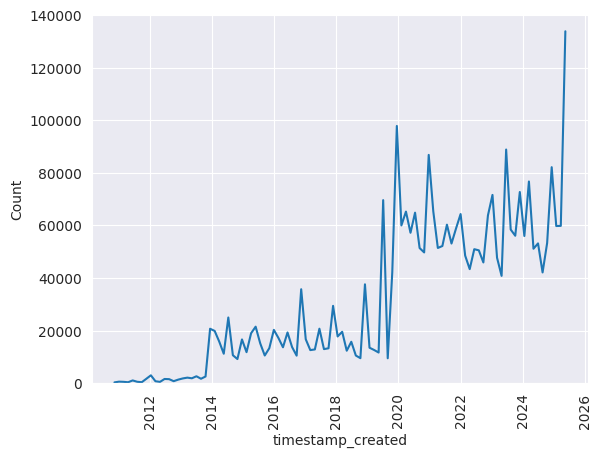

In [37]:
sns.histplot(x=timestamps, bins=100, element="poly", fill=False)
plt.xticks(rotation=90)
plt.show()

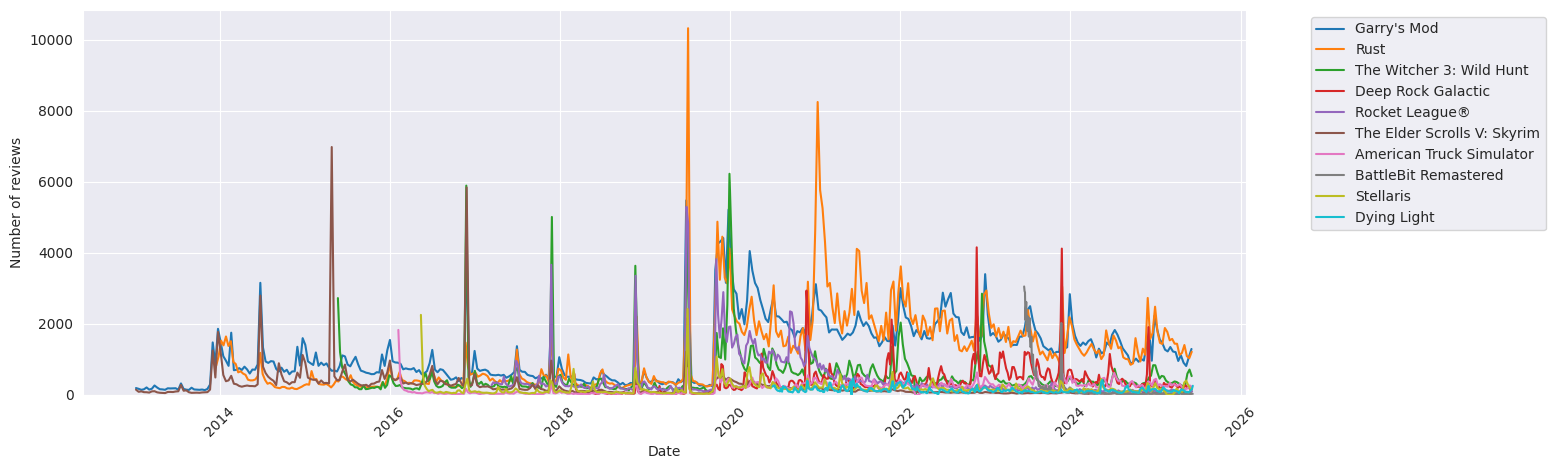

In [38]:
game_ids = popular_games["appid"].head(10).to_list()

plt.figure(figsize=(15, 5))
for game_id in game_ids:
    game_data = reviews_from_popular_games.filter(pl.col("appid") == game_id)
    game_name = game_data["name"].unique()[0]
    timestamps = pl.from_epoch(game_data["timestamp_created"], time_unit="s")
    timestamps = timestamps.filter((timestamps.dt.year() > 2012) & (timestamps.dt.year() <= 2025))
    sns.histplot(x=timestamps, bins=400, element="poly", fill=False, label=game_name)
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Number of reviews")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Rolling window for game scores at a given time

In [39]:
weighted_reviews = reviews_from_popular_games.sort(["name", "timestamp_created"]).with_columns([
    (pl.col("voted_up") * pl.col("weighted_vote_score")).alias("weighted_votes"),
    (pl.col("voted_up") * pl.col("weighted_vote_score")).cum_sum().over("appid").alias("cum_weighted_votes"),
    pl.col("weighted_vote_score").cum_sum().over("appid").alias("cum_weights")
]).with_columns([
    (pl.col("cum_weighted_votes") / pl.col("cum_weights")).alias("weighted_score")
])

In [40]:
weighted_reviews.select([
    'appid',
    'name',
    'timestamp_created',
    'voted_up',
    'weighted_vote_score',
    'weighted_votes',
    'cum_weighted_votes',
    'cum_weights',
    'weighted_score'
]).sort(['appid', 'timestamp_created'])


appid,name,timestamp_created,voted_up,weighted_vote_score,weighted_votes,cum_weighted_votes,cum_weights,weighted_score
i64,str,i64,bool,f64,f64,f64,f64,f64
300,"""Day of Defeat: Source""",1287498097,true,0.5,0.5,0.5,0.5,1.0
300,"""Day of Defeat: Source""",1290155222,true,0.386971,0.386971,0.886971,0.886971,1.0
300,"""Day of Defeat: Source""",1290187345,true,0.5,0.5,1.386971,1.386971,1.0
300,"""Day of Defeat: Source""",1290190543,true,0.59396,0.59396,1.980931,1.980931,1.0
300,"""Day of Defeat: Source""",1290192704,true,0.52381,0.52381,2.504741,2.504741,1.0
…,…,…,…,…,…,…,…,…
3107330,"""Nodebuster""",1749113200,true,0.5,0.5,4318.064569,4420.017236,0.976934
3107330,"""Nodebuster""",1749125280,true,0.5,0.5,4318.564569,4420.517236,0.976936
3107330,"""Nodebuster""",1749181876,true,0.5,0.5,4319.064569,4421.017236,0.976939


### Explore genres and categories

In [41]:
games_data_full

appid,name,type,required_age,is_free,minimum_pc_requirements,recommended_pc_requirements,controller_support,detailed_description,about_the_game,short_description,supported_languages,header_image,developers,publishers,price,genres,windows_support,mac_support,linux_support,release_date,coming_soon,recommendations,dlc,review_score,review_score_desc,total_positive_reviews,total_negative_reviews,total_reviews,categories
i64,str,str,i64,bool,str,str,str,str,str,str,list[str],str,list[str],list[str],f64,list[str],bool,bool,bool,str,bool,i64,list[i64],i64,str,i64,i64,i64,list[str]
1974390,"""Oyster VR""","""game""",0,true,"""Minimum:Requires a 64-bit proc…","""Recommended:Requires a 64-bit …",null,"""Oyster VR is a first-person an…","""Oyster VR is a first-person an…","""Oyster VR is a first-person an…","[""English""]","""https://shared.akamai.steamsta…","[""Sam Levine"", ""Kshitij Gajapure"", ""Paolo Villanueva""]","[""NY/NJ Baykeeper"", ""Anezka Sebek"", ""Tammy Walters""]",null,"[""Casual"", ""Simulation""]",true,true,false,"""Coming soon""",true,null,[],0,"""No reviews""",0,0,0,"[""Single-player"", ""Multi-player""]"
846250,"""Devious""","""game""",0,false,"""Minimum:OS *: Win XP+Processor…",null,null,"""<img class=""bb_img"" src=""https…","""<img class=""bb_img"" src=""https…","""A real time first person dunge…","[""English""]","""https://shared.akamai.steamsta…","[""Top Hat Curios""]","[""Nutaku Publishing""]",37.0,"[""Action"", ""Indie"", ""RPG""]",true,false,false,"""26 Jul, 2018""",false,null,[],0,"""4 user reviews""",2,2,4,"[""Single-player"", ""Family Sharing""]"
512260,"""Avalon Legends Solitaire 2""","""game""",0,false,"""Minimum:OS *: Windows Vista, 7…",null,null,"""<strong>Harness the magic of t…","""<strong>Harness the magic of t…","""Harness the power of the cards…","[""English"", ""French"", … ""Portuguese - Brazil""]","""https://shared.akamai.steamsta…","[""Anawiki Games""]","[""Anawiki Games""]",22.0,"[""Casual"", ""Indie""]",true,true,false,"""4 Oct, 2016""",false,null,[],7,"""Positive""",36,5,41,"[""Single-player"", ""Steam Achievements"", … ""Family Sharing""]"
621780,"""Virtually Impossible""","""game""",0,false,"""Minimum:OS *: Windows 7 SP1, W…","""Recommended:OS *: Windows 7 SP…",null,"""The Impossible VR Party Game. …","""The Impossible VR Party Game. …","""The Impossible VR Party Game. …","[""English""]","""https://shared.akamai.steamsta…","[""Growl Interactive""]","[""Growl Interactive""]",27.95,"[""Action"", ""Adventure"", … ""Simulation""]",true,false,false,"""13 Apr, 2017""",false,null,[],5,"""Mixed""",5,7,12,"[""Single-player"", ""Multi-player"", … ""Family Sharing""]"
3062580,"""Avocado""","""game""",0,true,"""Minimum:OS *: Windows 7 / 8 / …","""Recommended:OS *: Windows 7 / …",null,"""Avocado is a clicker Game, whe…","""Avocado is a clicker Game, whe…","""Avocado is a clicker game made…","[""English"", ""French"", … ""Vietnamese""]","""https://shared.akamai.steamsta…",[],[],null,"[""Adventure"", ""Simulation"", ""Free To Play""]",true,false,false,"""13 Jul, 2024""",false,null,[],0,"""No reviews""",0,0,0,"[""Single-player"", ""Steam Achievements"", ""In-App Purchases""]"
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
3109010,"""YOYO PUNK""","""game""",0,false,"""Minimum:Requires a 64-bit proc…","""Recommended:Requires a 64-bit …",null,"""<p class=""bb_paragraph""> …","""<p class=""bb_paragraph""> …","""🪀💥YOU ARE A YOYO 💥🪀Swing, Figh…","[""English""]","""https://shared.akamai.steamsta…","[""Silver Bullet Games""]","[""Silver Bullet Games""]",null,"[""Action""]",true,false,false,"""To be announced""",true,null,[],0,"""No reviews""",0,0,0,"[""Single-player"", ""Multi-player"", … ""Family Sharing""]"
2768010,"""Dizzy Fight""","""game""",0,false,"""Minimum:Requires a 64-bit proc…","""Recommended:Requires a 64-bit …",null,"""Break into the world of Dizzy …","""Break into the world of Dizzy …","""Choose a hero. Fight. Use supe…","[""English"", ""Ukrainian""]","""https://shared.akamai.steamsta…"

In [42]:
games_data_full_exploded = games_data_full.explode("categories")

In [43]:
platforms_sup = games_data_full.select("windows_support", "mac_support", "linux_support").sum()

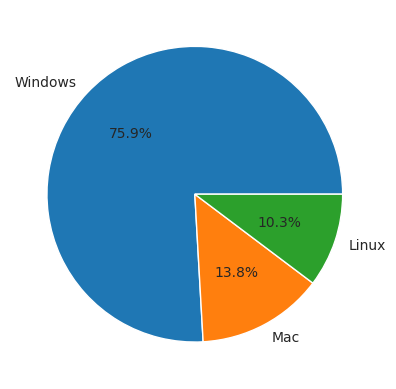

In [44]:
plt.pie(platforms_sup.to_numpy()[0], labels=["Windows", "Mac", "Linux"], autopct="%1.1f%%")
plt.show()

In [46]:
categories_count = games_data_full_exploded.group_by("categories").agg(pl.len().alias("count"))
categories_count.sort("count")

categories,count
str,u32
"""Mods (requires HL2)""",2
"""Mods""",2
"""SteamVR Collectibles""",36
"""Includes Source SDK""",83
"""VAC Enabled""",106
…,…
"""Steam Cloud""",24106
"""Full Controller Support""",25334
"""Steam Achievements""",46419


In [47]:
genres_count = games_data_full.explode("genres").group_by("genres").agg(pl.len().alias("count"))
genres_count.sort("count")

genres,count
str,u32
"""Tutorial""",1
"""Episodic""",1
"""360 Video""",1
"""Documentary""",1
"""Short""",1
…,…
"""Simulation""",21582
"""Casual""",41529
"""Adventure""",41862


<Axes: xlabel='num_dlcs', ylabel='Count'>

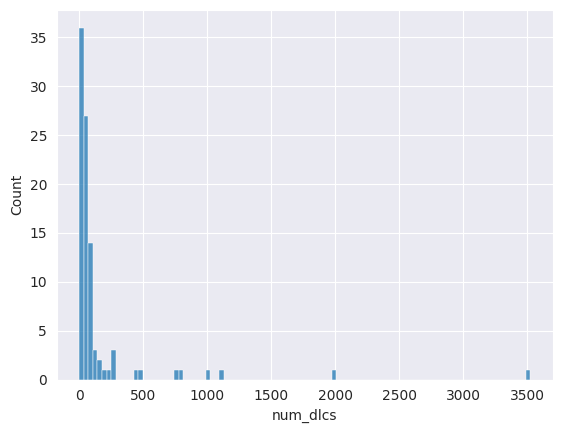

In [49]:
num_dlcs = games_data_full.with_columns([pl.col("dlc").list.len().alias("num_dlcs")])
num_dlcs_count = num_dlcs.group_by("num_dlcs").agg(pl.len().alias("count")).sort("num_dlcs", descending=True)
sns.histplot(num_dlcs_count, x="num_dlcs", bins=100)

In [50]:
num_dlcs.filter(pl.col("num_dlcs") > 100).explode("genres").group_by("genres").agg(pl.len()).sort("len",
                                                                                                  descending=True)

genres,len
str,u32
"""Simulation""",10
"""RPG""",6
"""Action""",5
"""Indie""",4
"""Strategy""",4
…,…
"""Casual""",3
"""Web Publishing""",3
"""Design & Illustration""",3


In [51]:
num_dlcs.filter(pl.col("num_dlcs") > 100).explode("categories").group_by("categories").agg(pl.len()).sort("len",
                                                                                                          descending=True)


categories,len
str,u32
"""Single-player""",17
"""Family Sharing""",15
"""Steam Achievements""",13
"""Steam Trading Cards""",12
"""Steam Cloud""",11
…,…
"""LAN Co-op""",1
"""VR Only""",1
"""MMO""",1


### Release Date

In [52]:
games_data_full

appid,name,type,required_age,is_free,minimum_pc_requirements,recommended_pc_requirements,controller_support,detailed_description,about_the_game,short_description,supported_languages,header_image,developers,publishers,price,genres,windows_support,mac_support,linux_support,release_date,coming_soon,recommendations,dlc,review_score,review_score_desc,total_positive_reviews,total_negative_reviews,total_reviews,categories
i64,str,str,i64,bool,str,str,str,str,str,str,list[str],str,list[str],list[str],f64,list[str],bool,bool,bool,str,bool,i64,list[i64],i64,str,i64,i64,i64,list[str]
1974390,"""Oyster VR""","""game""",0,true,"""Minimum:Requires a 64-bit proc…","""Recommended:Requires a 64-bit …",null,"""Oyster VR is a first-person an…","""Oyster VR is a first-person an…","""Oyster VR is a first-person an…","[""English""]","""https://shared.akamai.steamsta…","[""Sam Levine"", ""Kshitij Gajapure"", ""Paolo Villanueva""]","[""NY/NJ Baykeeper"", ""Anezka Sebek"", ""Tammy Walters""]",null,"[""Casual"", ""Simulation""]",true,true,false,"""Coming soon""",true,null,[],0,"""No reviews""",0,0,0,"[""Single-player"", ""Multi-player""]"
846250,"""Devious""","""game""",0,false,"""Minimum:OS *: Win XP+Processor…",null,null,"""<img class=""bb_img"" src=""https…","""<img class=""bb_img"" src=""https…","""A real time first person dunge…","[""English""]","""https://shared.akamai.steamsta…","[""Top Hat Curios""]","[""Nutaku Publishing""]",37.0,"[""Action"", ""Indie"", ""RPG""]",true,false,false,"""26 Jul, 2018""",false,null,[],0,"""4 user reviews""",2,2,4,"[""Single-player"", ""Family Sharing""]"
512260,"""Avalon Legends Solitaire 2""","""game""",0,false,"""Minimum:OS *: Windows Vista, 7…",null,null,"""<strong>Harness the magic of t…","""<strong>Harness the magic of t…","""Harness the power of the cards…","[""English"", ""French"", … ""Portuguese - Brazil""]","""https://shared.akamai.steamsta…","[""Anawiki Games""]","[""Anawiki Games""]",22.0,"[""Casual"", ""Indie""]",true,true,false,"""4 Oct, 2016""",false,null,[],7,"""Positive""",36,5,41,"[""Single-player"", ""Steam Achievements"", … ""Family Sharing""]"
621780,"""Virtually Impossible""","""game""",0,false,"""Minimum:OS *: Windows 7 SP1, W…","""Recommended:OS *: Windows 7 SP…",null,"""The Impossible VR Party Game. …","""The Impossible VR Party Game. …","""The Impossible VR Party Game. …","[""English""]","""https://shared.akamai.steamsta…","[""Growl Interactive""]","[""Growl Interactive""]",27.95,"[""Action"", ""Adventure"", … ""Simulation""]",true,false,false,"""13 Apr, 2017""",false,null,[],5,"""Mixed""",5,7,12,"[""Single-player"", ""Multi-player"", … ""Family Sharing""]"
3062580,"""Avocado""","""game""",0,true,"""Minimum:OS *: Windows 7 / 8 / …","""Recommended:OS *: Windows 7 / …",null,"""Avocado is a clicker Game, whe…","""Avocado is a clicker Game, whe…","""Avocado is a clicker game made…","[""English"", ""French"", … ""Vietnamese""]","""https://shared.akamai.steamsta…",[],[],null,"[""Adventure"", ""Simulation"", ""Free To Play""]",true,false,false,"""13 Jul, 2024""",false,null,[],0,"""No reviews""",0,0,0,"[""Single-player"", ""Steam Achievements"", ""In-App Purchases""]"
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
3109010,"""YOYO PUNK""","""game""",0,false,"""Minimum:Requires a 64-bit proc…","""Recommended:Requires a 64-bit …",null,"""<p class=""bb_paragraph""> …","""<p class=""bb_paragraph""> …","""🪀💥YOU ARE A YOYO 💥🪀Swing, Figh…","[""English""]","""https://shared.akamai.steamsta…","[""Silver Bullet Games""]","[""Silver Bullet Games""]",null,"[""Action""]",true,false,false,"""To be announced""",true,null,[],0,"""No reviews""",0,0,0,"[""Single-player"", ""Multi-player"", … ""Family Sharing""]"
2768010,"""Dizzy Fight""","""game""",0,false,"""Minimum:Requires a 64-bit proc…","""Recommended:Requires a 64-bit …",null,"""Break into the world of Dizzy …","""Break into the world of Dizzy …","""Choose a hero. Fight. Use supe…","[""English"", ""Ukrainian""]","""https://shared.akamai.steamsta…"

In [55]:
games_data_full.filter(pl.col("release_date") == "").select("appid", "name")

appid,name
i64,str
912720,"""Time Traveling Raptors"""
63620,"""Cosmic Osmo and the Worlds Bey…"
1512380,"""Dead Zone"""
1510010,"""《述梦》"""
387820,"""Build a Game Universe"""
…,…
654200,"""Seven: Reboot"""
792920,"""BRIG 12"""
2022640,"""XTAL"""


In [53]:
games_data_full.with_columns(
    pl.coalesce([
        pl.col("release_date").str.strptime(pl.Date, "%b %d, %Y", strict=False),
        pl.col("release_date").str.strptime(pl.Date, "%d %b, %Y", strict=False),
    ]).alias("parsed_release_date")
)

appid,name,type,required_age,is_free,minimum_pc_requirements,recommended_pc_requirements,controller_support,detailed_description,about_the_game,short_description,supported_languages,header_image,developers,publishers,price,genres,windows_support,mac_support,linux_support,release_date,coming_soon,recommendations,dlc,review_score,review_score_desc,total_positive_reviews,total_negative_reviews,total_reviews,categories,parsed_release_date
i64,str,str,i64,bool,str,str,str,str,str,str,list[str],str,list[str],list[str],f64,list[str],bool,bool,bool,str,bool,i64,list[i64],i64,str,i64,i64,i64,list[str],date
1974390,"""Oyster VR""","""game""",0,true,"""Minimum:Requires a 64-bit proc…","""Recommended:Requires a 64-bit …",null,"""Oyster VR is a first-person an…","""Oyster VR is a first-person an…","""Oyster VR is a first-person an…","[""English""]","""https://shared.akamai.steamsta…","[""Sam Levine"", ""Kshitij Gajapure"", ""Paolo Villanueva""]","[""NY/NJ Baykeeper"", ""Anezka Sebek"", ""Tammy Walters""]",null,"[""Casual"", ""Simulation""]",true,true,false,"""Coming soon""",true,null,[],0,"""No reviews""",0,0,0,"[""Single-player"", ""Multi-player""]",null
846250,"""Devious""","""game""",0,false,"""Minimum:OS *: Win XP+Processor…",null,null,"""<img class=""bb_img"" src=""https…","""<img class=""bb_img"" src=""https…","""A real time first person dunge…","[""English""]","""https://shared.akamai.steamsta…","[""Top Hat Curios""]","[""Nutaku Publishing""]",37.0,"[""Action"", ""Indie"", ""RPG""]",true,false,false,"""26 Jul, 2018""",false,null,[],0,"""4 user reviews""",2,2,4,"[""Single-player"", ""Family Sharing""]",2018-07-26
512260,"""Avalon Legends Solitaire 2""","""game""",0,false,"""Minimum:OS *: Windows Vista, 7…",null,null,"""<strong>Harness the magic of t…","""<strong>Harness the magic of t…","""Harness the power of the cards…","[""English"", ""French"", … ""Portuguese - Brazil""]","""https://shared.akamai.steamsta…","[""Anawiki Games""]","[""Anawiki Games""]",22.0,"[""Casual"", ""Indie""]",true,true,false,"""4 Oct, 2016""",false,null,[],7,"""Positive""",36,5,41,"[""Single-player"", ""Steam Achievements"", … ""Family Sharing""]",2016-10-04
621780,"""Virtually Impossible""","""game""",0,false,"""Minimum:OS *: Windows 7 SP1, W…","""Recommended:OS *: Windows 7 SP…",null,"""The Impossible VR Party Game. …","""The Impossible VR Party Game. …","""The Impossible VR Party Game. …","[""English""]","""https://shared.akamai.steamsta…","[""Growl Interactive""]","[""Growl Interactive""]",27.95,"[""Action"", ""Adventure"", … ""Simulation""]",true,false,false,"""13 Apr, 2017""",false,null,[],5,"""Mixed""",5,7,12,"[""Single-player"", ""Multi-player"", … ""Family Sharing""]",2017-04-13
3062580,"""Avocado""","""game""",0,true,"""Minimum:OS *: Windows 7 / 8 / …","""Recommended:OS *: Windows 7 / …",null,"""Avocado is a clicker Game, whe…","""Avocado is a clicker Game, whe…","""Avocado is a clicker game made…","[""English"", ""French"", … ""Vietnamese""]","""https://shared.akamai.steamsta…",[],[],null,"[""Adventure"", ""Simulation"", ""Free To Play""]",true,false,false,"""13 Jul, 2024""",false,null,[],0,"""No reviews""",0,0,0,"[""Single-player"", ""Steam Achievements"", ""In-App Purchases""]",2024-07-13
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
3109010,"""YOYO PUNK""","""game""",0,false,"""Minimum:Requires a 64-bit proc…","""Recommended:Requires a 64-bit …",null,"""<p class=""bb_paragraph""> …","""<p class=""bb_paragraph""> …","""🪀💥YOU ARE A YOYO 💥🪀Swing, Figh…","[""English""]","""https://shared.akamai.steamsta…","[""Silver Bullet Games""]","[""Silver Bullet Games""]",null,"[""Action""]",true,false,false,"""To be announced""",true,null,[],0,"""No reviews""",0,0,0,"[""Single-player"", ""Multi-player"", … ""Family Sharing""]",null
2768010,"""Dizzy Fight""","""game""",0,false,"""Minimum:Requires a 64-bit proc…","""Recommended:Requires a 64-bit …",null,"""Break into the world of Dizzy …","""Break into the world of Dizzy …","""Choose a hero. Fig